![measuring scalabitiy](https://raw.githubusercontent.com/egy1st/images/main/clustering/scalability_1.jpg)

we are going to measure the scalability of a simple algorithm on working a sunthestic datasets of 1000000 samples with an increment of 1000 for each cycle

In [1]:
from sklearn import cluster, datasets, mixture
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import os.path

import warnings
warnings.filterwarnings('ignore')

In [2]:
# install DenMune clustering algorithm using pip command from the offecial Python repository, PyPi
# from https://pypi.org/project/denmune/
!pip install denmune

# then import it
from denmune import DenMune

     |████████████████████████████████| 2.2 MB 594 kB/s            
  Preparing metadata (setup.py) ... - done
     |████████████████████████████████| 41 kB 402 kB/s             
  Created wheel for treelib: filename=treelib-1.6.1-py3-none-any.whl size=18386 sha256=fa1342aa86496fca2682e27de37372b6c02d9db5f178cf385e3d757b612e3c86
  Stored in directory: /root/.cache/pip/wheels/89/be/94/2c6d949ce599d1443426d83ba4dc93cd35c0f4638260930a53
Successfully built treelib


In [3]:
# Denmune's Paramaters
knn = 25 # k-nearest neighbor, the only parameter required by the algorithm
data_scale = []

for n in range(1000, 100000, 1000):
    n_samples = n
    noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
    
    data= noisy_circles[0]
    data_labels = noisy_circles[1]
    dm = DenMune(train_data=data, k_nearest=knn, rgn_tsne=True)
    labels, validity = dm.fit_predict(show_noise=True, show_analyzer=False, show_plots=False)
    time_exec = dm.analyzer['exec_time']['DenMune']
    data_scale.append([n, time_exec ])

    print('data size:',n ,  'time:' , round(time_exec,4), 'seconds')

data size: 1000 time: 0.333 seconds
data size: 2000 time: 0.595 seconds
data size: 3000 time: 1.1276 seconds
data size: 4000 time: 1.7952 seconds
data size: 5000 time: 2.3139 seconds
data size: 6000 time: 3.1343 seconds
data size: 7000 time: 3.3585 seconds
data size: 8000 time: 4.4224 seconds
data size: 9000 time: 4.7971 seconds
data size: 10000 time: 5.8752 seconds
data size: 11000 time: 6.5827 seconds
data size: 12000 time: 9.6683 seconds
data size: 13000 time: 9.4713 seconds
data size: 14000 time: 11.0425 seconds
data size: 15000 time: 12.4535 seconds
data size: 16000 time: 13.9596 seconds
data size: 17000 time: 14.9328 seconds
data size: 18000 time: 16.5946 seconds
data size: 19000 time: 19.186 seconds
data size: 20000 time: 18.8466 seconds
data size: 21000 time: 24.373 seconds
data size: 22000 time: 20.9085 seconds
data size: 23000 time: 22.8801 seconds
data size: 24000 time: 27.1555 seconds
data size: 25000 time: 28.992 seconds
data size: 26000 time: 27.9907 seconds
data size: 27

In [4]:
# creating moving average to smoth the curve
x, y = zip(*data_scale)
window = 5
cumsum, moving_aves = [0], []

for i, n in enumerate(y, 1):
    cumsum.append(cumsum[i-1] + n)
    if i>=window:
        moving_ave = (cumsum[i] - cumsum[i-window])/window
        #can do stuff with moving_ave here
        moving_aves.append(moving_ave)
y = moving_aves        

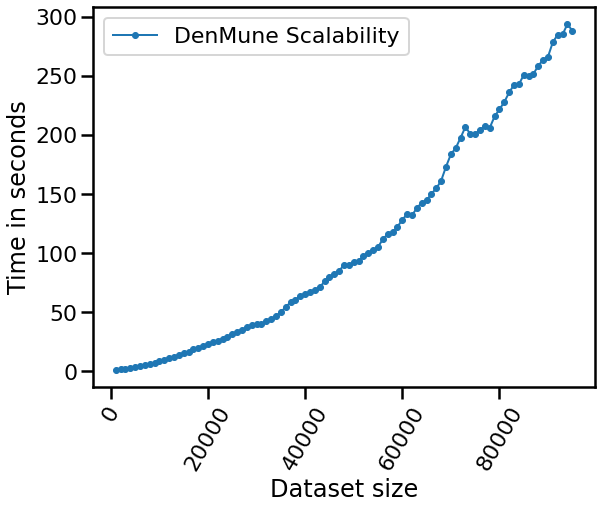

In [5]:
# Creating figure and axis objects using subplots()
fig, ax = plt.subplots(figsize=[9, 7])
ax.plot(x[:-window+1], y, marker='.', linewidth=2, label='DenMune Scalability')
plt.xticks(rotation=60)
ax.set_xlabel('Dataset size')
ax.set_ylabel('Time in seconds')
plt.legend()
plt.show()